<a href="https://colab.research.google.com/github/AlekyaDakarapu/Stock-market-Forecasting/blob/main/Stock_market_forecasting_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd

# Set your API key
API_KEY = "0FGB88M5VFA4QGC9"

# Function to fetch stock data
def get_stock_data(symbol, output_size="compact"):
    base_url = "https://www.alphavantage.co/query"
    params = {
        "function": "TIME_SERIES_DAILY",  # Free daily stock prices
        "symbol": symbol,
        "apikey": API_KEY,
        "outputsize": output_size,  # "compact" (100 days) or "full" (20+ years)
        "datatype": "json"
    }

    response = requests.get(base_url, params=params)
    data = response.json()

    # Extract time series data
    if "Time Series (Daily)" in data:
        df = pd.DataFrame.from_dict(data["Time Series (Daily)"], orient="index")
        df = df.astype(float)  # Convert values to float
        df.index = pd.to_datetime(df.index)  # Convert index to datetime
        df.sort_index(inplace=True)  # Sort by date
        return df
    else:
        print("Error fetching data:", data)
        return None

# Example usage
symbol = "AAPL"  # Apple stock
df = get_stock_data(symbol)

if df is not None:
    print(df.head())  # Display first few rows
    df.to_csv(f"{symbol}_historical_data.csv")  # Save to CSV


            1. open  2. high  3. low  4. close   5. volume
2024-09-23  227.340   229.45  225.81    226.47  54146023.0
2024-09-24  228.645   229.35  225.73    227.37  43556068.0
2024-09-25  224.930   227.29  224.02    226.37  42308715.0
2024-09-26  227.300   228.50  225.41    227.52  36636707.0
2024-09-27  228.460   229.52  227.30    227.79  34025967.0


In [ ]:
df.to_csv(f"{symbol}_historical_data.csv")


In [ ]:
import pandas as pd

# Load stock data from CSV
symbol = "AAPL"  # Update with your stock symbol
file_name = f"{symbol}_historical_data.csv"

df = pd.read_csv(file_name, index_col=0, parse_dates=True)

In [ ]:
df

,1. open,2. high,3. low,4. close,5. volume
2024-09-23,227.340,229.4500,225.81,226.47,54146023.0
2024-09-24,228.645,229.3500,225.73,227.37,43556068.0
2024-09-25,224.930,227.2900,224.02,226.37,42308715.0
2024-09-26,227.300,228.5000,225.41,227.52,36636707.0
2024-09-27,228.460,229.5200,227.30,227.79,34025967.0
...,...,...,...,...,...
2025-02-10,229.570,230.5850,227.20,227.65,33115645.0
2025-02-11,228.200,235.2300,228.13,232.62,53718362.0
2025-02-12,231.200,236.9600,230.68,236.87,45243292.0
2025-02-13,236.910,242.3399,235.57,241.53,53614054.0


In [ ]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Display column names
print("Columns in Data:\n", df.columns)

# Summary statistics
print("Summary Statistics:\n", df.describe())


Missing Values:
 1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64
Columns in Data:
 Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
Summary Statistics:
           1. open     2. high      3. low    4. close     5. volume
count  100.000000  100.000000  100.000000  100.000000  1.000000e+02
mean   234.285100  236.612763  232.384825  234.809400  4.720193e+07
std      9.443462    9.456776    9.340083    9.466892  1.807984e+07
min    219.790000  222.790000  219.380000  221.690000  2.323470e+07
25%    227.287500  229.487500  225.400000  227.542500  3.654115e+07
50%    231.857500  233.925000  229.685000  232.710000  4.212301e+07
75%    241.395000  243.811725  239.187500  242.320000  5.364013e+07
max    258.190000  260.100000  257.630000  259.020000  1.474953e+08


Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')


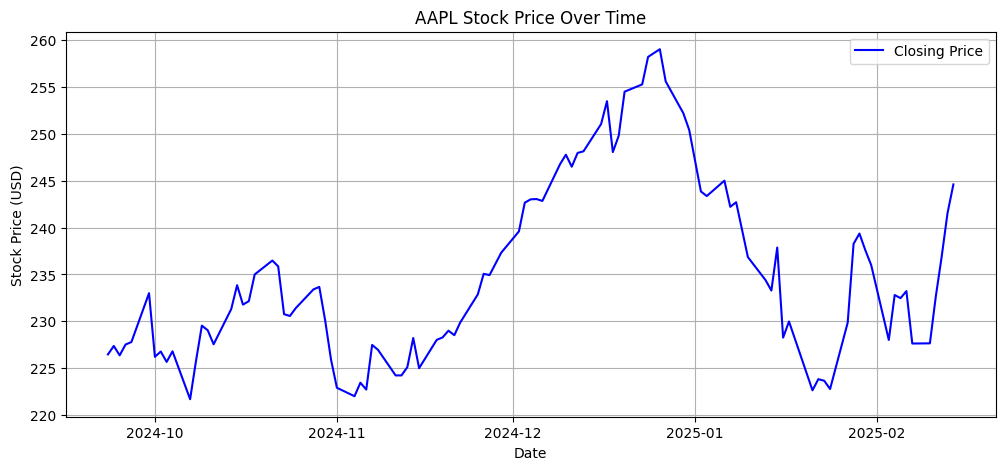

In [ ]:
import matplotlib.pyplot as plt

# Check available columns
print(df.columns)

# Find the correct column for closing price
closing_price_col = "5. adjusted close" if "5. adjusted close" in df.columns else "4. close"

# Plot stock closing prices
plt.figure(figsize=(12, 5))
plt.plot(df.index, df[closing_price_col], label='Closing Price', color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title(f"{symbol} Stock Price Over Time")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Calculate 50-day & 200-day Simple Moving Averages (SMA)
df['SMA_50'] = df[closing_price_col].rolling(window=50).mean()
df['SMA_200'] = df[closing_price_col].rolling(window=200).mean()

# Calculate 50-day Exponential Moving Average (EMA)
df['EMA_50'] = df[closing_price_col].ewm(span=50, adjust=False).mean()


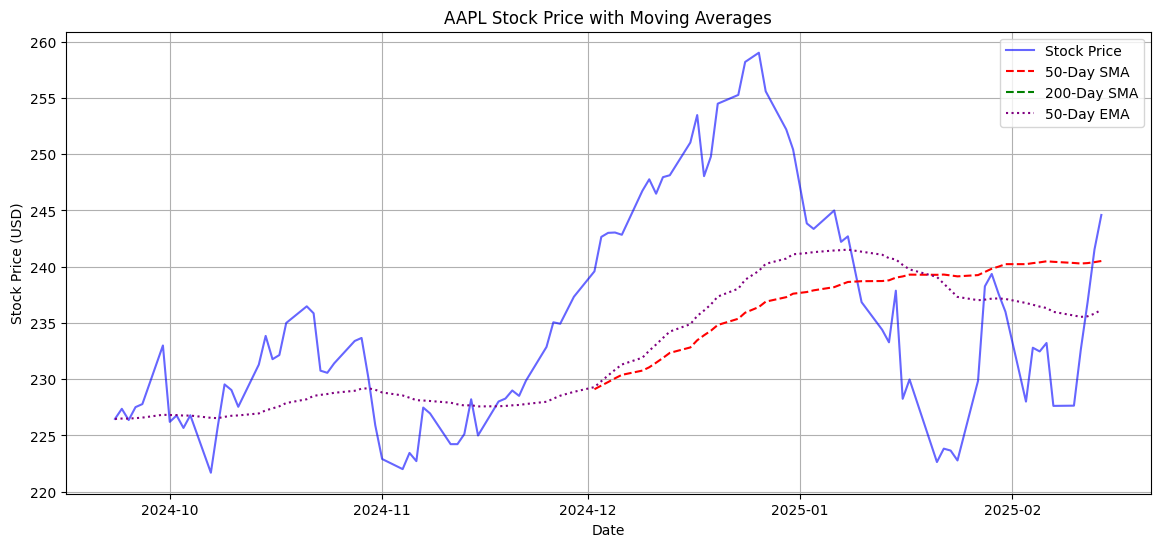

In [ ]:
# Plot Closing Price with Moving Averages
plt.figure(figsize=(14, 6))
plt.plot(df.index, df[closing_price_col], label="Stock Price", color="blue", alpha=0.6)
plt.plot(df.index, df['SMA_50'], label="50-Day SMA", color="red", linestyle="dashed")
plt.plot(df.index, df['SMA_200'], label="200-Day SMA", color="green", linestyle="dashed")
plt.plot(df.index, df['EMA_50'], label="50-Day EMA", color="purple", linestyle="dotted")

plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title(f"{symbol} Stock Price with Moving Averages")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Create a new column for signals: 1 (Buy), -1 (Sell), 0 (Neutral)
df['Signal'] = 0  # Default is Neutral
df.loc[df['SMA_50'] > df['SMA_200'], 'Signal'] = 1  # Golden Cross (Buy)
df.loc[df['SMA_50'] < df['SMA_200'], 'Signal'] = -1  # Death Cross (Sell)

# Identify crossover points
df['Crossover'] = df['Signal'].diff()  # Detect changes in trend

# Filter Buy & Sell Signals
buy_signals = df[df['Crossover'] == 1]
sell_signals = df[df['Crossover'] == -1]


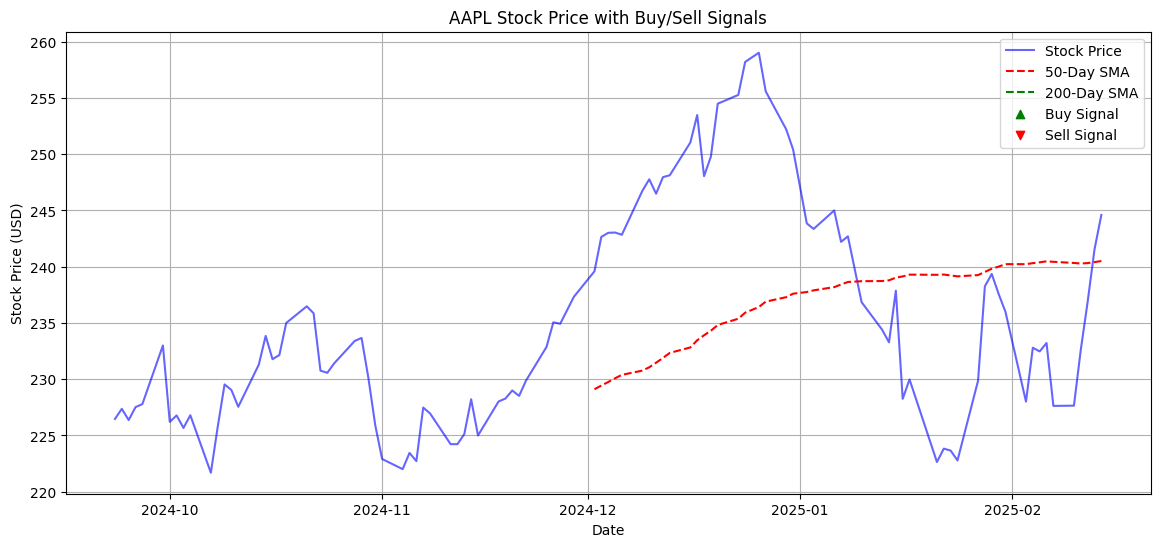

In [ ]:
# Plot stock price with moving averages
plt.figure(figsize=(14, 6))
plt.plot(df.index, df[closing_price_col], label="Stock Price", color="blue", alpha=0.6)
plt.plot(df.index, df['SMA_50'], label="50-Day SMA", color="red", linestyle="dashed")
plt.plot(df.index, df['SMA_200'], label="200-Day SMA", color="green", linestyle="dashed")

# Plot Buy Signals (Golden Cross)
plt.scatter(buy_signals.index, buy_signals[closing_price_col], marker="^", color="green", label="Buy Signal", alpha=1)

# Plot Sell Signals (Death Cross)
plt.scatter(sell_signals.index, sell_signals[closing_price_col], marker="v", color="red", label="Sell Signal", alpha=1)

plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title(f"{symbol} Stock Price with Buy/Sell Signals")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Initialize variables
initial_cash = 10000  # Starting with $10,000
cash = initial_cash
position = 0  # Number of shares held
portfolio_value = []  # Track portfolio value over time

# Iterate through the DataFrame
for date, row in df.iterrows():
    price = row[closing_price_col]  # Current stock price
    signal = row['Crossover']  # Buy/Sell signal

    # Buy signal (Golden Cross) - Invest all cash
    if signal == 1 and cash > 0:
        position = cash / price  # Buy max shares
        cash = 0  # All money invested

    # Sell signal (Death Cross) - Sell all shares
    elif signal == -1 and position > 0:
        cash = position * price  # Convert shares to cash
        position = 0  # Exit market

    # Track portfolio value (cash + value of held shares)
    portfolio_value.append(cash + (position * price))

# Convert to Pandas Series for visualization
df["Portfolio Value"] = portfolio_value


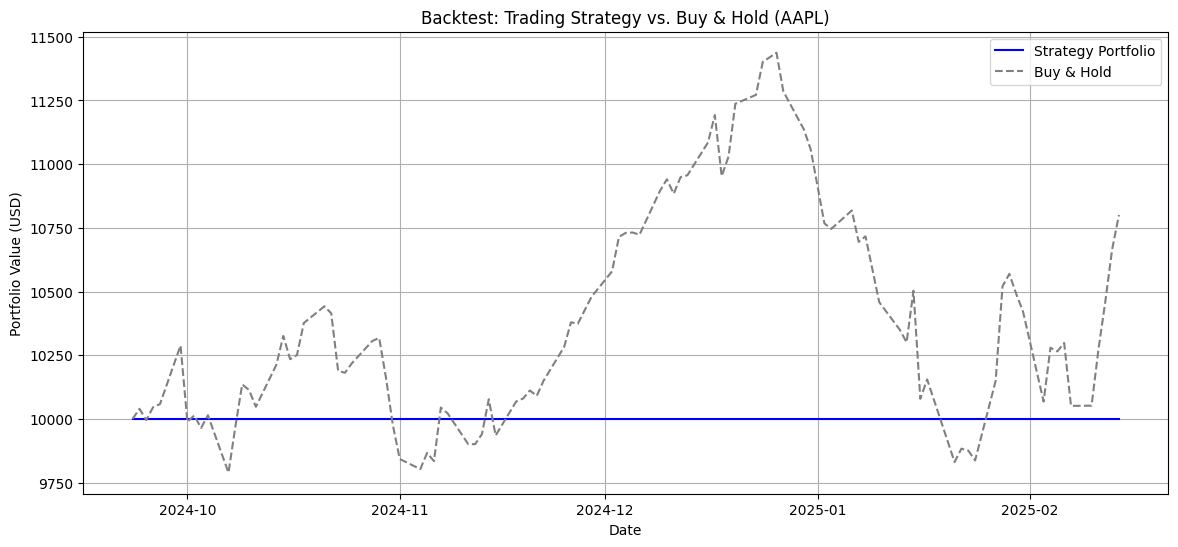

In [ ]:
# Calculate Buy & Hold Performance
df["Buy & Hold Value"] = initial_cash * (df[closing_price_col] / df[closing_price_col].iloc[0])

# Plot Performance
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["Portfolio Value"], label="Strategy Portfolio", color="blue")
plt.plot(df.index, df["Buy & Hold Value"], label="Buy & Hold", color="gray", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Portfolio Value (USD)")
plt.title(f"Backtest: Trading Strategy vs. Buy & Hold ({symbol})")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Calculate 20-day & 100-day SMAs
df['SMA_20'] = df[closing_price_col].rolling(window=20).mean()
df['SMA_100'] = df[closing_price_col].rolling(window=100).mean()

# Identify new buy/sell signals
df['Signal'] = 0
df.loc[df['SMA_20'] > df['SMA_100'], 'Signal'] = 1  # Golden Cross (Buy)
df.loc[df['SMA_20'] < df['SMA_100'], 'Signal'] = -1  # Death Cross (Sell)

df['Crossover'] = df['Signal'].diff()

# Identify buy/sell points
buy_signals = df[df['Crossover'] == 1]
sell_signals = df[df['Crossover'] == -1]


In [ ]:
# RSI Calculation
window_length = 14
delta = df[closing_price_col].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=window_length).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_length).mean()

rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

# Mark Overbought & Oversold Zones
df['RSI_Signal'] = 0
df.loc[df['RSI'] < 30, 'RSI_Signal'] = 1  # Oversold (Buy)
df.loc[df['RSI'] > 70, 'RSI_Signal'] = -1  # Overbought (Sell)


In [ ]:
# MACD Calculation
df['MACD'] = df[closing_price_col].ewm(span=12, adjust=False).mean() - df[closing_price_col].ewm(span=26, adjust=False).mean()
df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Detect Buy/Sell signals using MACD
df['MACD_Crossover'] = df['MACD'] - df['MACD_Signal']
df['MACD_Trend'] = 0
df.loc[df['MACD_Crossover'] > 0, 'MACD_Trend'] = 1  # Bullish
df.loc[df['MACD_Crossover'] < 0, 'MACD_Trend'] = -1  # Bearish


In [ ]:
# Improved Buy Signal: Golden Cross + RSI Oversold + MACD Bullish
df['Improved_Buy'] = (df['Crossover'] == 1) & (df['RSI_Signal'] == 1) & (df['MACD_Trend'] == 1)

# Improved Sell Signal: Death Cross + RSI Overbought + MACD Bearish
df['Improved_Sell'] = (df['Crossover'] == -1) & (df['RSI_Signal'] == -1) & (df['MACD_Trend'] == -1)

# Extract Buy/Sell signals
buy_signals = df[df['Improved_Buy']]
sell_signals = df[df['Improved_Sell']]


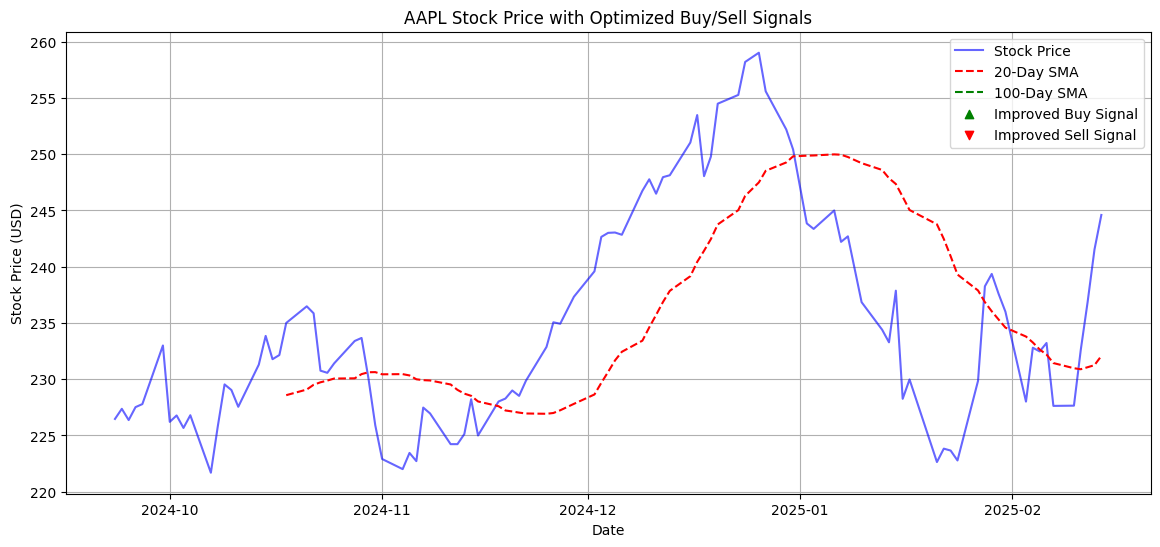

In [ ]:
# Plot stock price with moving averages
plt.figure(figsize=(14, 6))
plt.plot(df.index, df[closing_price_col], label="Stock Price", color="blue", alpha=0.6)
plt.plot(df.index, df['SMA_20'], label="20-Day SMA", color="red", linestyle="dashed")
plt.plot(df.index, df['SMA_100'], label="100-Day SMA", color="green", linestyle="dashed")

# Plot Improved Buy (Green) and Sell (Red) signals
plt.scatter(buy_signals.index, buy_signals[closing_price_col], marker="^", color="green", label="Improved Buy Signal", alpha=1)
plt.scatter(sell_signals.index, sell_signals[closing_price_col], marker="v", color="red", label="Improved Sell Signal", alpha=1)

plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title(f"{symbol} Stock Price with Optimized Buy/Sell Signals")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Initialize Portfolio Variables
initial_cash = 10000  # Start with $10,000
cash = initial_cash
position = 0  # Number of shares held
portfolio_value = []  # Track portfolio value over time
trade_log = []  # Track buy/sell trades

# Iterate through the DataFrame
for date, row in df.iterrows():
    price = row[closing_price_col]  # Current stock price

    # Check for Buy Signal
    if row['Improved_Buy'] and cash > 0:
        position = cash / price  # Buy max shares
        cash = 0  # All money invested
        trade_log.append((date, "BUY", price))

    # Check for Sell Signal
    elif row['Improved_Sell'] and position > 0:
        cash = position * price  # Sell all shares
        position = 0  # Exit market
        trade_log.append((date, "SELL", price))

    # Track Portfolio Value (cash + value of held shares)
    portfolio_value.append(cash + (position * price))

# Store Portfolio Performance in DataFrame
df["Improved Portfolio Value"] = portfolio_value


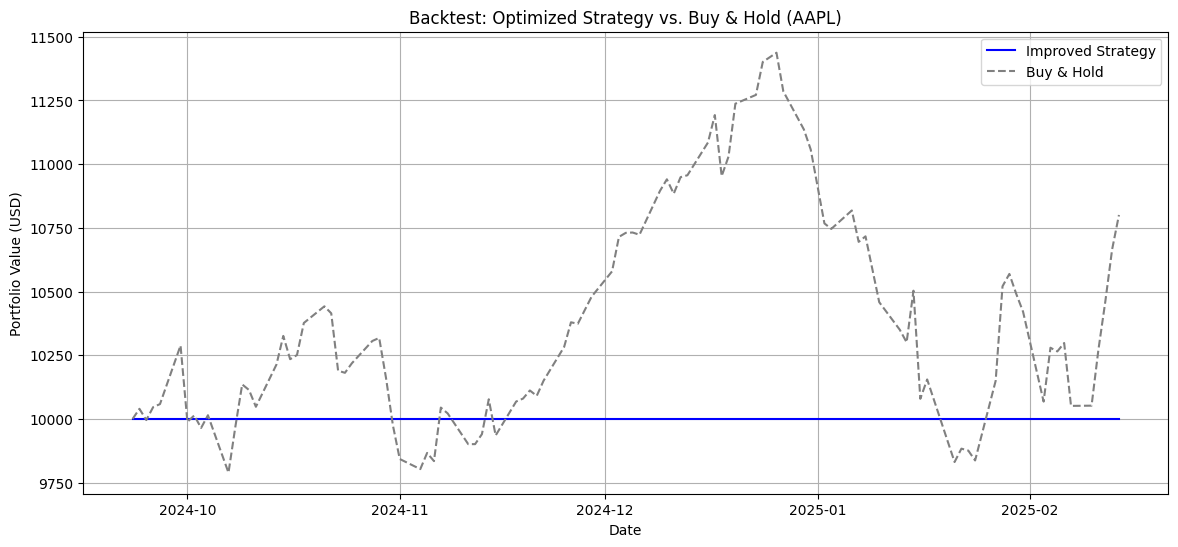

In [ ]:
# Buy & Hold Performance (Holding from Start to End)
df["Buy & Hold Value"] = initial_cash * (df[closing_price_col] / df[closing_price_col].iloc[0])

# Plot Performance
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["Improved Portfolio Value"], label="Improved Strategy", color="blue")
plt.plot(df.index, df["Buy & Hold Value"], label="Buy & Hold", color="gray", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Portfolio Value (USD)")
plt.title(f"Backtest: Optimized Strategy vs. Buy & Hold ({symbol})")
plt.legend()
plt.grid()
plt.show()


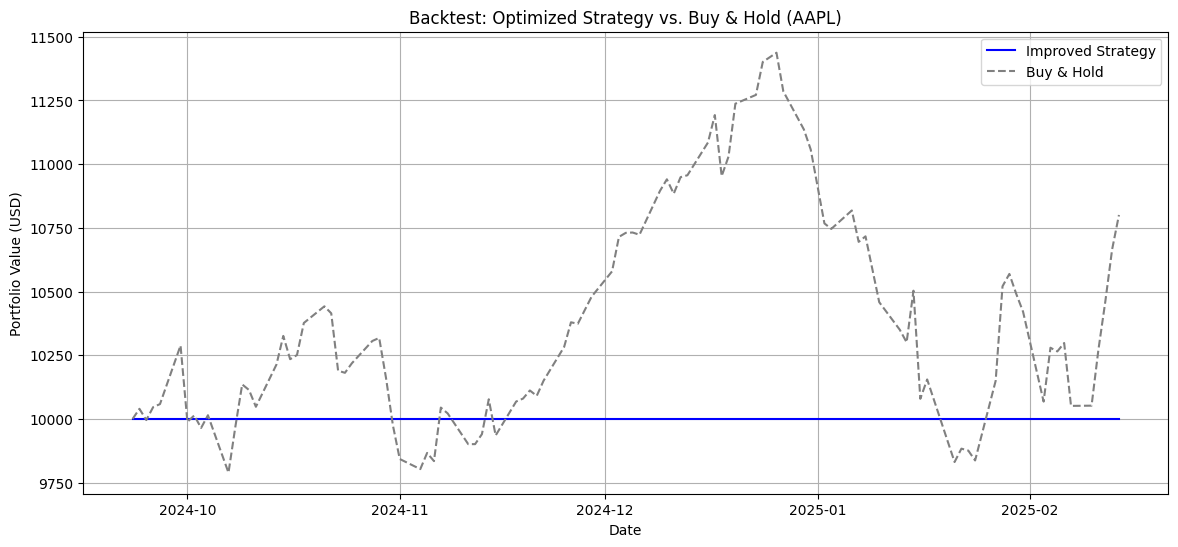

In [ ]:
# Buy & Hold Performance (Holding from Start to End)
df["Buy & Hold Value"] = initial_cash * (df[closing_price_col] / df[closing_price_col].iloc[0])

# Plot Performance
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["Improved Portfolio Value"], label="Improved Strategy", color="blue")
plt.plot(df.index, df["Buy & Hold Value"], label="Buy & Hold", color="gray", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Portfolio Value (USD)")
plt.title(f"Backtest: Optimized Strategy vs. Buy & Hold ({symbol})")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Calculate Total Return
final_value = df["Improved Portfolio Value"].iloc[-1]
total_return = (final_value - initial_cash) / initial_cash * 100

# Calculate Number of Trades & Win Rate
trade_df = pd.DataFrame(trade_log, columns=["Date", "Type", "Price"])
trade_df['Return'] = trade_df['Price'].pct_change()  # % Change in price per trade
win_rate = (trade_df['Return'] > 0).mean() * 100  # % of trades that made profit

# Calculate Maximum Drawdown
df["Peak"] = df["Improved Portfolio Value"].cummax()
df["Drawdown"] = (df["Improved Portfolio Value"] - df["Peak"]) / df["Peak"]
max_drawdown = df["Drawdown"].min() * 100  # Convert to %

# Print Results
print(f"📊 Strategy Performance:")
print(f"🔹 Final Portfolio Value: ${final_value:,.2f}")
print(f"🔹 Total Return: {total_return:.2f}%")
print(f"🔹 Win Rate: {win_rate:.2f}%")
print(f"🔹 Max Drawdown: {max_drawdown:.2f}%")


📊 Strategy Performance:
🔹 Final Portfolio Value: $10,000.00
🔹 Total Return: 0.00%
🔹 Win Rate: nan%
🔹 Max Drawdown: 0.00%
